# **Cell 1: Mengimpor library yang diperlukan untuk analisis dan visualisasi**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from wordcloud import WordCloud
from collections import Counter
import warnings
import os
import json

# Menonaktifkan peringatan untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("📊 Library berhasil diimport!")

📊 Library berhasil diimport!


# **Cell 2: Memuat hasil prediksi dari file CSV**

In [ ]:
# Memuat hasil prediksi dari file CSV
try:
    # Mencoba memuat file prediksi lengkap
    df = pd.read_csv('/content/granite_predictions_complete_20251003_094126.csv')
    print(f"✅ Data predictions dimuat: {df.shape}")
except:
    # Jika gagal, memuat file individu dan menggabungkannya
    sector_df = pd.read_csv('/content/predictions_sector.csv')
    summary_df = pd.read_csv('/content/predictions_summary.csv')
    sentiment_df = pd.read_csv('/content/predictions_sentiment.csv')

    # Menggabungkan file berdasarkan kolom 'id', 'date', 'source', 'title'
    df = sector_df.merge(summary_df, on=['id','date','source','title'])
    df = df.merge(sentiment_df, on=['id','date','source','title'])
    print(f"✅ Data merged dari individual files: {df.shape}")

# Mengonversi kolom tanggal ke format datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.year

# Menampilkan informasi rentang tanggal dan jumlah artikel
print(f"📅 Rentang tanggal: {df['date'].min()} hingga {df['date'].max()}")
print(f"📊 Total artikel valid: {len(df)}")

✅ Data predictions dimuat: (61, 11)
📅 Rentang tanggal: 2025-04-29 00:00:00 hingga 2025-10-01 00:00:00
📊 Total artikel valid: 61


# **Cell 3: Menganalisis distribusi artikel berdasarkan sektor**


🎯 ANALISIS DISTRIBUSI SEKTOR
Distribusi Sektor:
  other: 23 artikel (37.7%)
  government: 13 artikel (21.3%)
  fintech: 13 artikel (21.3%)
  ecommerce: 4 artikel (6.6%)
  edutech: 3 artikel (4.9%)
  manufaktur: 3 artikel (4.9%)
  kesehatan: 1 artikel (1.6%)
  pangan: 1 artikel (1.6%)


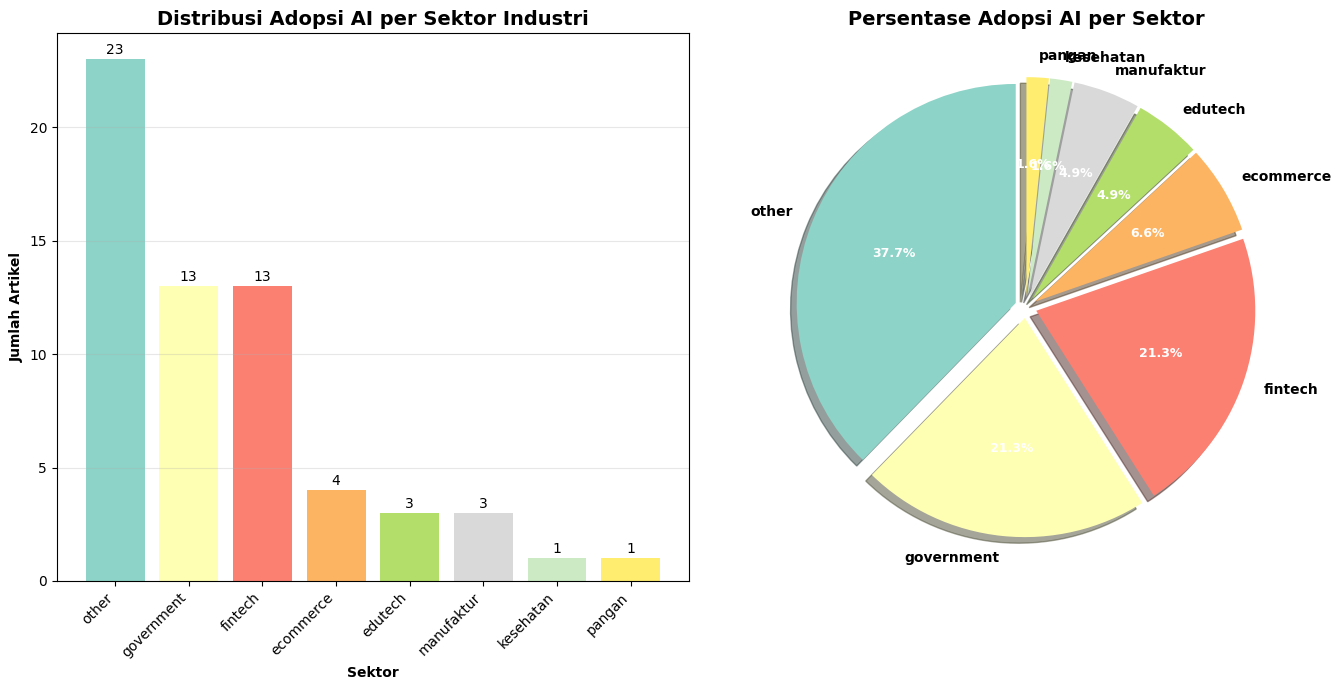


VERSI ALTERNATIF DENGAN LEGEND


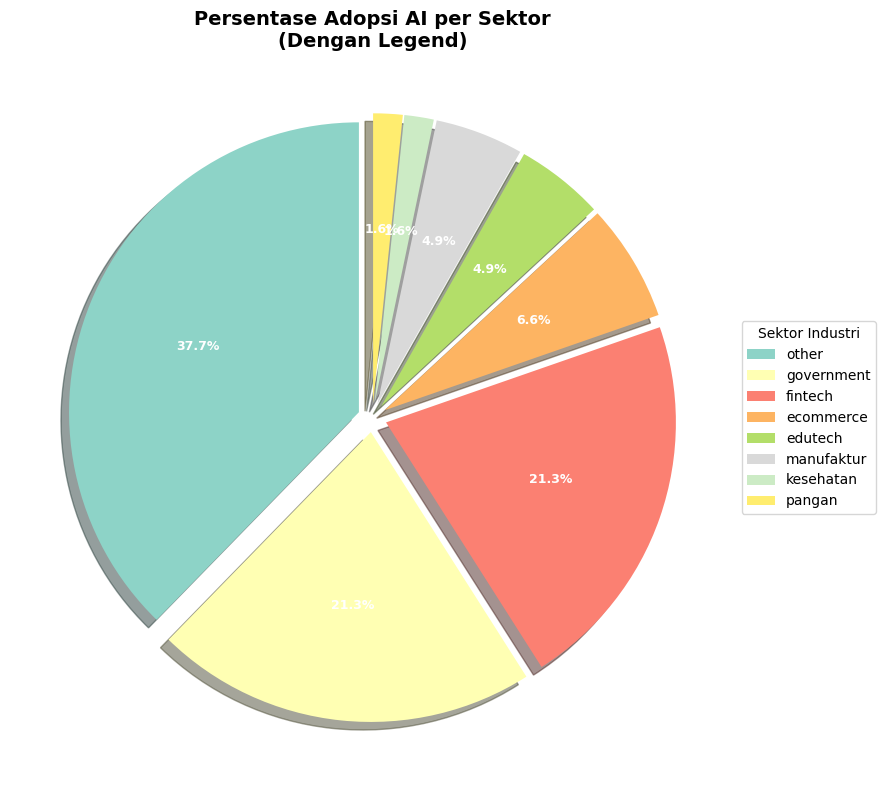

In [ ]:
print("🎯 ANALISIS DISTRIBUSI SEKTOR")
print("="*50)

# Menghitung jumlah artikel per sektor
sector_dist = df['sector'].value_counts()
print("Distribusi Sektor:")
for sector, count in sector_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {sector}: {count} artikel ({percentage:.1f}%)")

# Visualisasi distribusi sektor menggunakan bar dan pie chart
plt.figure(figsize=(14, 7))

# Bar chart
plt.subplot(1, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(sector_dist)))
bars = plt.bar(sector_dist.index, sector_dist.values, color=colors)
plt.title('Distribusi Adopsi AI per Sektor Industri', fontsize=14, fontweight='bold')
plt.xlabel('Sektor', fontweight='bold')
plt.ylabel('Jumlah Artikel', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.subplot(1, 2, 2)

explode = [0.05] * len(sector_dist)

wedges, texts, autotexts = plt.pie(sector_dist.values,
                                   labels=sector_dist.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   explode=explode,
                                   shadow=True,
                                   textprops={'fontsize': 10})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')

plt.title('Persentase Adopsi AI per Sektor', fontsize=14, fontweight='bold')

plt.tight_layout()

# Membuat direktori untuk menyimpan gambar
os.makedirs('assets/figures', exist_ok=True)
plt.savefig('assets/figures/sector_distribution.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# Alternatif: Pie chart dengan legend
print("\nVERSI ALTERNATIF DENGAN LEGEND")
plt.figure(figsize=(10, 8))

# Pie chart dengan legend di samping
wedges, texts, autotexts = plt.pie(sector_dist.values,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   explode=explode,
                                   shadow=True,
                                   textprops={'fontsize': 9})

# Memperbaiki tampilan persentase
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Menambahkan legend di luar pie chart
plt.legend(wedges, sector_dist.index,
          title="Sektor Industri",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Persentase Adopsi AI per Sektor\n(Dengan Legend)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('assets/figures/sector_distribution_legend.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.show()

# **Cell 4: Menganalisis distribusi sentimen per sektor**


😊 ANALISIS SENTIMEN PER SEKTOR
Sentimen per Sektor (%):
sentiment   negative  neutral  positive
sector                                 
ecommerce        0.0     25.0      75.0
edutech          0.0      0.0     100.0
fintech         23.1     15.4      61.5
government       7.7     61.5      30.8
kesehatan      100.0      0.0       0.0
manufaktur      33.3     66.7       0.0
other           30.4     34.8      34.8
pangan           0.0      0.0     100.0


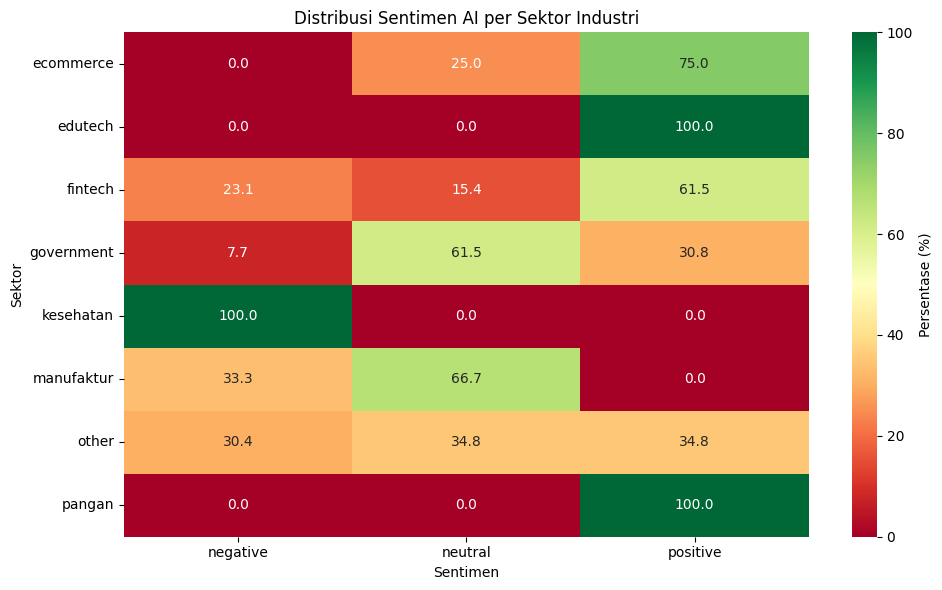

<Figure size 1200x600 with 0 Axes>

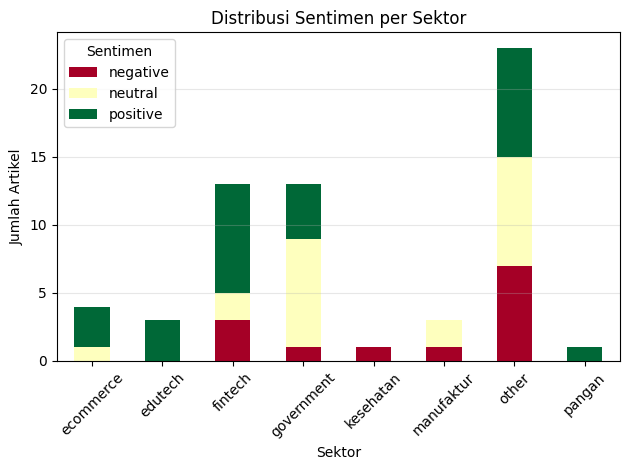

In [ ]:
print("\n😊 ANALISIS SENTIMEN PER SEKTOR")
print("="*50)

# Membuat direktori untuk menyimpan gambar jika belum ada
os.makedirs('assets/figures', exist_ok=True)

# Membuat tabel silang (crosstab) sentimen vs sektor dalam persentase
sentiment_cross = pd.crosstab(df['sector'], df['sentiment'], normalize='index') * 100
print("Sentimen per Sektor (%):")
print(sentiment_cross.round(1))

# Visualisasi heatmap distribusi sentimen
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_cross, annot=True, fmt='.1f', cmap='RdYlGn',
            center=50, cbar_kws={'label': 'Persentase (%)'})
plt.title('Distribusi Sentimen AI per Sektor Industri')
plt.xlabel('Sentimen')
plt.ylabel('Sektor')
plt.tight_layout()
plt.savefig('assets/figures/sentiment_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualisasi stacked bar chart
plt.figure(figsize=(12, 6))
sentiment_counts = pd.crosstab(df['sector'], df['sentiment'])
sentiment_counts.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Distribusi Sentimen per Sektor')
plt.xlabel('Sektor')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.legend(title='Sentimen')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('assets/figures/sentiment_stacked.png', dpi=300, bbox_inches='tight')
plt.show()

# **Cell 5: Menganalisis tren jumlah artikel berdasarkan waktu**



📈 ANALISIS TREND WAKTU
Trend Bulanan:
  year_month  article_count year_month_str
0    2025-04              1        2025-04
1    2025-06              3        2025-06
2    2025-07              1        2025-07
3    2025-09             23        2025-09
4    2025-10             33        2025-10

Trend Tahunan:
   year  article_count
0  2025             61


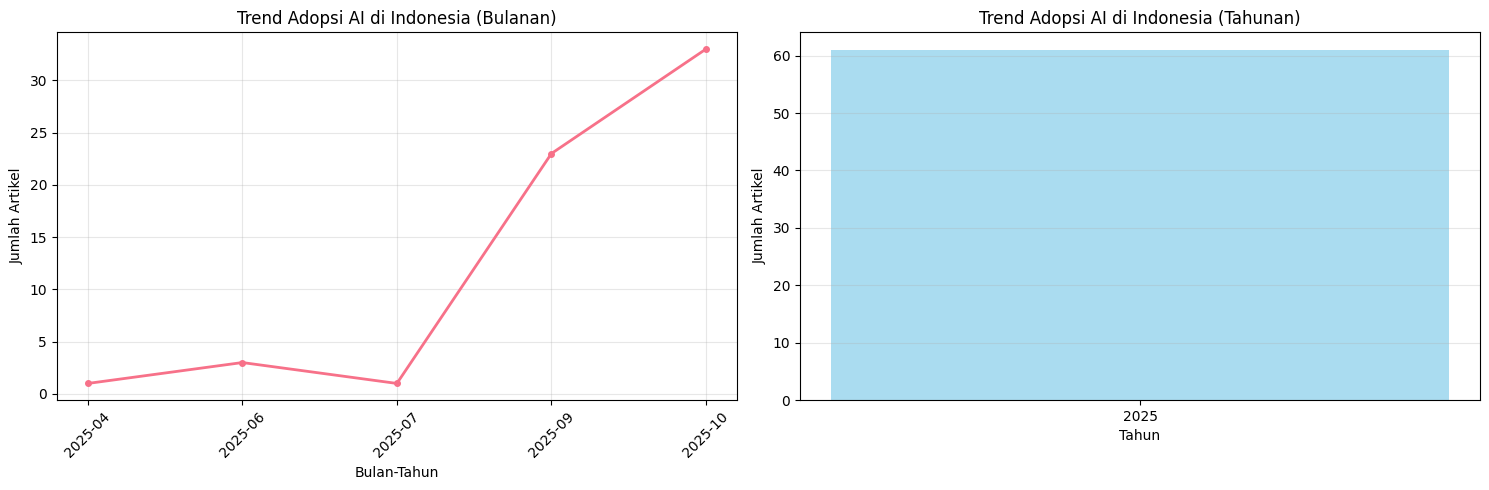

In [ ]:
print("\n📈 ANALISIS TREND WAKTU")
print("="*50)

# Menghitung tren bulanan
monthly_trend = df.groupby('year_month').size().reset_index(name='article_count')
monthly_trend['year_month_str'] = monthly_trend['year_month'].astype(str)
print("Trend Bulanan:")
print(monthly_trend)

# Menghitung tren tahunan
yearly_trend = df.groupby('year').size().reset_index(name='article_count')
print("\nTrend Tahunan:")
print(yearly_trend)

# Visualisasi tren bulanan dan tahunan
plt.figure(figsize=(15, 5))

# Plot tren bulanan
plt.subplot(1, 2, 1)
plt.plot(monthly_trend['year_month_str'], monthly_trend['article_count'],
         marker='o', linewidth=2, markersize=4)
plt.title('Trend Adopsi AI di Indonesia (Bulanan)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot tren tahunan
plt.subplot(1, 2, 2)
plt.bar(yearly_trend['year'].astype(str), yearly_trend['article_count'],
        color='skyblue', alpha=0.7)
plt.title('Trend Adopsi AI di Indonesia (Tahunan)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Artikel')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('assets/figures/timeline_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# **cell 6: Menganalisis distribusi sumber berita**


📰 ANALISIS SUMBER BERITA
Top 10 Sumber Berita:
  katadata.co.id: 16 artikel
  www.kompas.com: 15 artikel
  tekno.kompas.com: 13 artikel
  www.viva.co.id: 9 artikel
  money.kompas.com: 5 artikel
  bandung.kompas.com: 1 artikel
  nasional.kompas.com: 1 artikel
  lampung.viva.co.id: 1 artikel


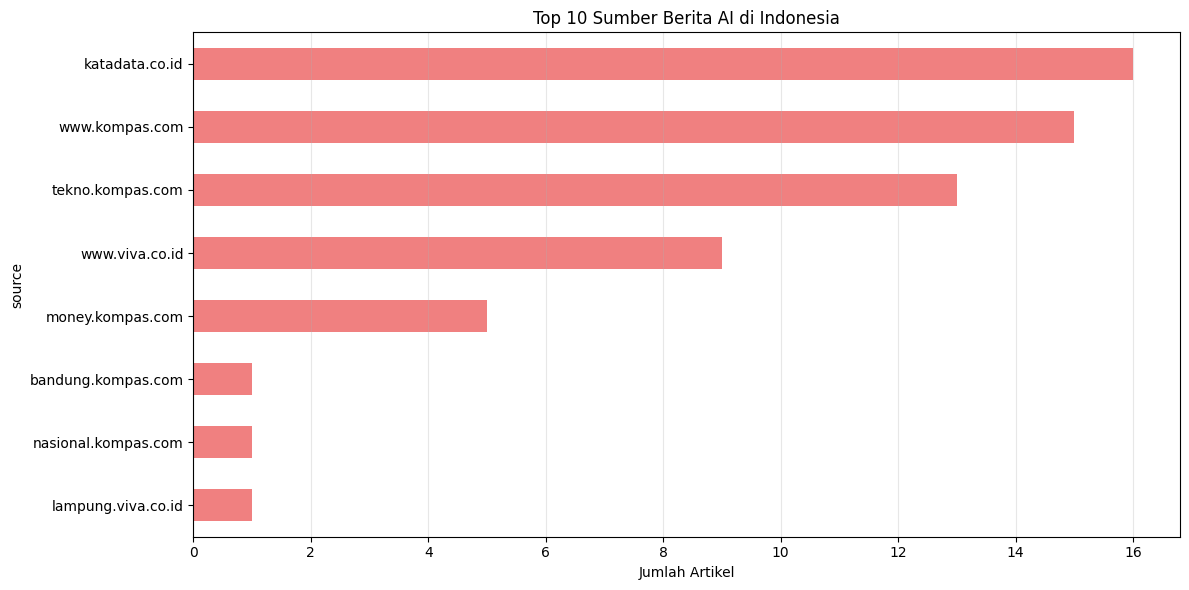

In [ ]:
print("\n📰 ANALISIS SUMBER BERITA")
print("="*50)

# Menghitung top 10 sumber berita
source_dist = df['source'].value_counts().head(10)
print("Top 10 Sumber Berita:")
for source, count in source_dist.items():
    print(f"  {source}: {count} artikel")

# Visualisasi top 10 sumber berita dengan bar chart horizontal
plt.figure(figsize=(12, 6))
source_dist.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Sumber Berita AI di Indonesia')
plt.xlabel('Jumlah Artikel')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('assets/figures/news_sources.png', dpi=300, bbox_inches='tight')
plt.show()

# **Cell 7: Menganalisis kata kunci dominan dengan WordCloud**


🔤 ANALISIS KATA KUNCI


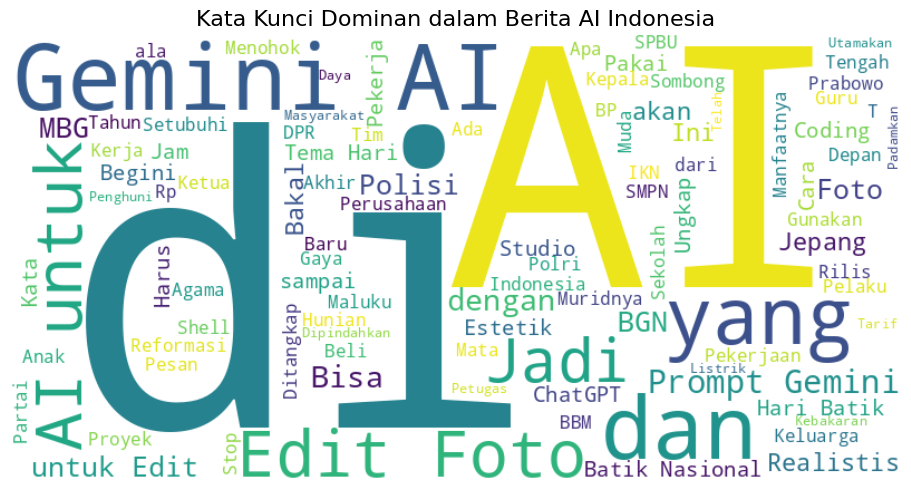

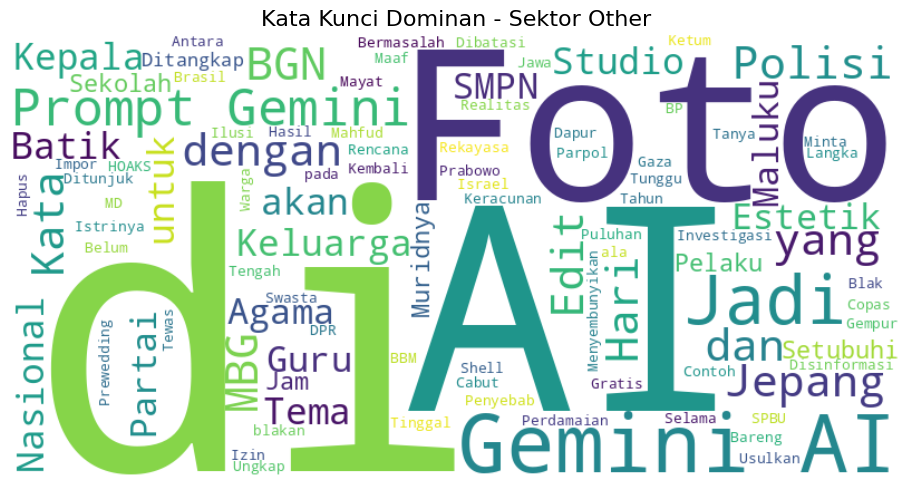

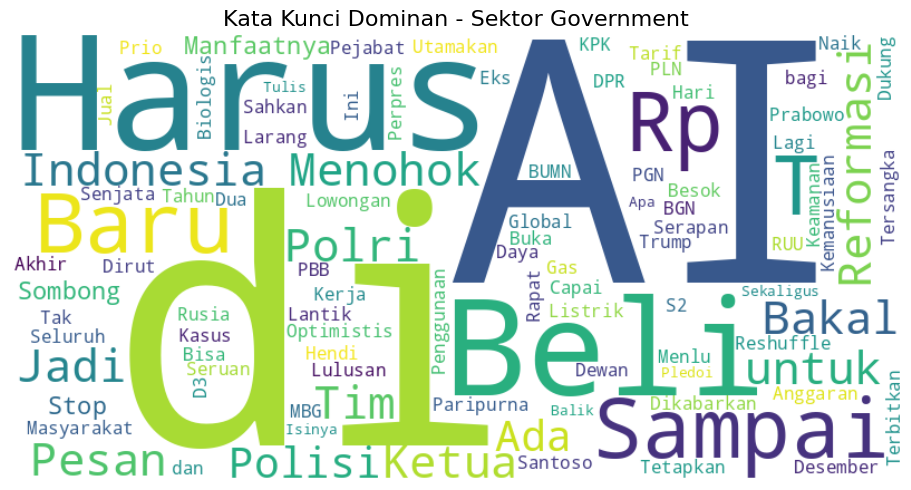

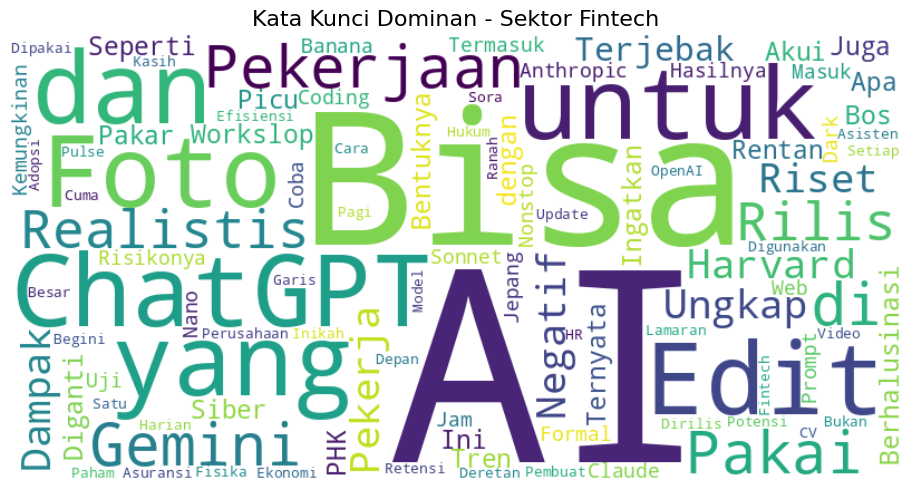

In [ ]:
print("\n🔤 ANALISIS KATA KUNCI")
print("="*50)

def generate_wordcloud(text, title, filename):
    """Menghasilkan WordCloud dari teks input"""
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'assets/figures/{filename}', dpi=300, bbox_inches='tight')
    plt.show()

# Membuat WordCloud untuk semua judul artikel
all_text = ' '.join(df['title'].dropna().astype(str))
generate_wordcloud(all_text, 'Kata Kunci Dominan dalam Berita AI Indonesia', 'wordcloud_general.png')

# Membuat WordCloud untuk 3 sektor teratas
top_sectors = df['sector'].value_counts().head(3).index
for sector in top_sectors:
    sector_text = ' '.join(df[df['sector'] == sector]['title'].dropna().astype(str))
    if len(sector_text) > 10:
        generate_wordcloud(sector_text, f'Kata Kunci Dominan - Sektor {sector.title()}', f'wordcloud_{sector}.png')

# **Cell 8: Menganalisis tren sentimen dari waktu ke waktu**


📊 TREND SENTIMEN OVER TIME


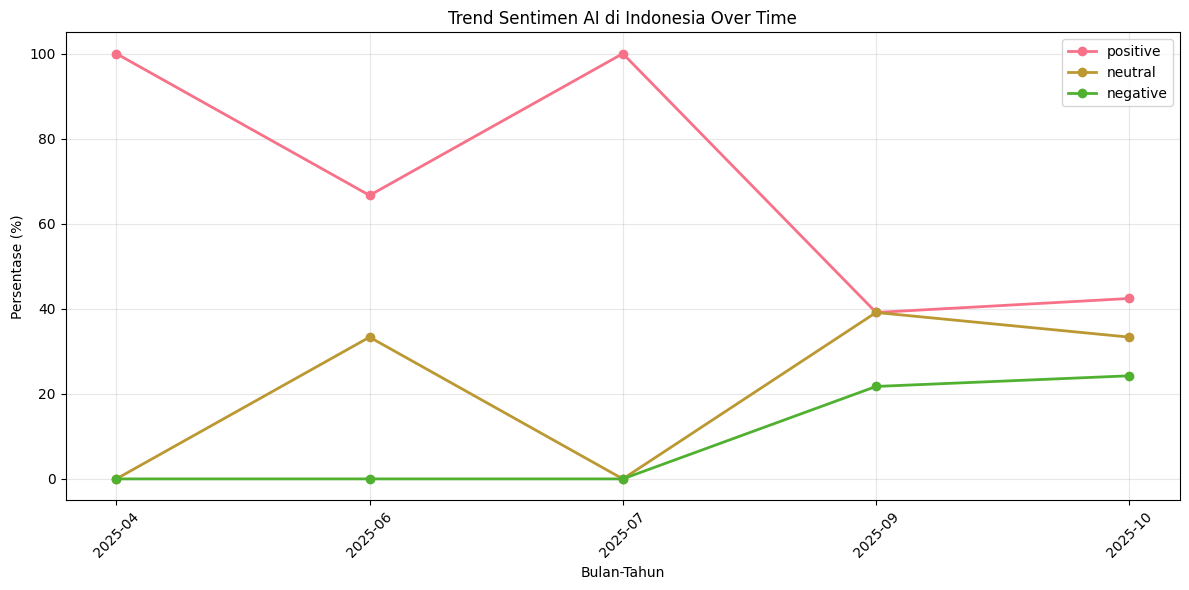

In [ ]:
print("\n📊 TREND SENTIMEN OVER TIME")
print("="*50)

# Menghitung tren sentimen bulanan
monthly_sentiment = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)
monthly_sentiment_pct = monthly_sentiment.div(monthly_sentiment.sum(axis=1), axis=0) * 100

# Visualisasi tren sentimen
plt.figure(figsize=(12, 6))
for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment in monthly_sentiment_pct.columns:
        plt.plot(monthly_sentiment_pct.index.astype(str),
                monthly_sentiment_pct[sentiment],
                marker='o', label=sentiment, linewidth=2)

plt.title('Trend Sentimen AI di Indonesia Over Time')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('assets/figures/sentiment_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# **Cell 9: Menganalisis tingkat adopsi AI per sektor**


🚀 ANALISIS TINGKAT ADOPSI PER SEKTOR
Metrics per Sektor:
            total_articles  positive_rate  adoption_intensity
sector                                                       
ecommerce                4           75.0                 6.6
edutech                  3          100.0                 4.9
fintech                 13           61.5                21.3
government              13           30.8                21.3
kesehatan                1            0.0                 1.6
manufaktur               3            0.0                 4.9
other                   23           34.8                37.7
pangan                   1          100.0                 1.6


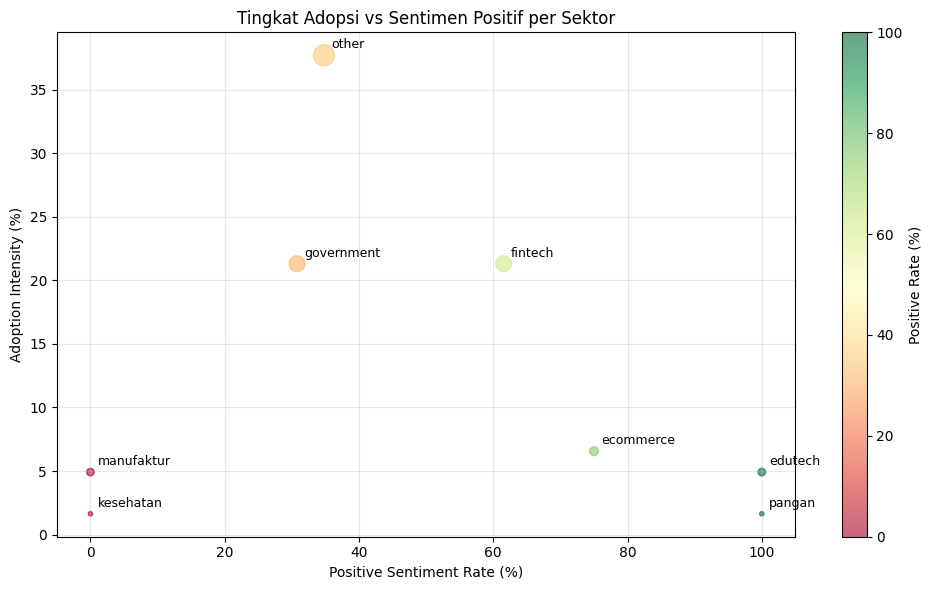

In [ ]:
print("\n🚀 ANALISIS TINGKAT ADOPSI PER SEKTOR")
print("="*50)

# Menghitung metrik per sektor
sector_metrics = df.groupby('sector').agg({
    'id': 'count',
    'sentiment': lambda x: (x == 'positive').sum() / len(x) * 100
}).rename(columns={'id': 'total_articles', 'sentiment': 'positive_rate'})

sector_metrics['adoption_intensity'] = sector_metrics['total_articles'] / sector_metrics['total_articles'].sum() * 100

print("Metrics per Sektor:")
print(sector_metrics.round(1))

# Visualisasi bubble chart: Adoption Intensity vs Positive Rate
plt.figure(figsize=(10, 6))
scatter = plt.scatter(sector_metrics['positive_rate'],
                     sector_metrics['adoption_intensity'],
                     s=sector_metrics['total_articles']*10,
                     alpha=0.6,
                     c=sector_metrics['positive_rate'],
                     cmap='RdYlGn')

# Menambahkan anotasi untuk setiap sektor
for sector in sector_metrics.index:
    plt.annotate(sector,
                (sector_metrics.loc[sector, 'positive_rate'],
                 sector_metrics.loc[sector, 'adoption_intensity']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.colorbar(scatter, label='Positive Rate (%)')
plt.xlabel('Positive Sentiment Rate (%)')
plt.ylabel('Adoption Intensity (%)')
plt.title('Tingkat Adopsi vs Sentimen Positif per Sektor')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('assets/figures/adoption_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# **Cell 10: Menyimpan hasil analisis ke file**

In [ ]:
print("\n💾 MENYIMPAN HASIL ANALISIS")
print("="*50)

# Membuat direktori jika belum ada
os.makedirs('assets/figures', exist_ok=True)
os.makedirs('data/analysis', exist_ok=True)

# Menyimpan dataset analisis
analysis_df = df[['id', 'date', 'source', 'title', 'sector', 'sentiment', 'summary', 'year_month', 'year']]
analysis_df.to_csv('data/analysis/final_analysis_dataset.csv', index=False, encoding='utf-8')

# Menyimpan statistik ringkasan
summary_stats = {
    'total_articles': len(df),
    'date_range': f"{df['date'].min()} to {df['date'].max()}",
    'sectors_covered': df['sector'].nunique(),
    'sources_covered': df['source'].nunique(),
    'positive_articles': len(df[df['sentiment'] == 'positive']),
    'negative_articles': len(df[df['sentiment'] == 'negative']),
    'neutral_articles': len(df[df['sentiment'] == 'neutral']),
    'most_covered_sector': df['sector'].value_counts().index[0],
    'dominant_sentiment': df['sentiment'].value_counts().index[0]
}

with open('data/analysis/summary_statistics.json', 'w', encoding='utf-8') as f:
    json.dump(summary_stats, f, indent=2, ensure_ascii=False)

print("✅ Dataset analisis disimpan: data/analysis/final_analysis_dataset.csv")
print("✅ Summary statistics disimpan: data/analysis/summary_statistics.json")
print("✅ Semua visualisasi disimpan di: assets/figures/")


💾 MENYIMPAN HASIL ANALISIS
✅ Dataset analisis disimpan: data/analysis/final_analysis_dataset.csv
✅ Summary statistics disimpan: data/analysis/summary_statistics.json
✅ Semua visualisasi disimpan di: assets/figures/


# **Cell 11: Menampilkan ringkasan insights utama**

In [ ]:
print("\n🔍 PREVIEW INSIGHTS UTAMA")
print("="*50)

# Insight 1: Sektor teratas
top_sector = sector_metrics.index[0]
top_sector_positive = sector_metrics.loc[top_sector, 'positive_rate']

# Insight 2: Persentase sentimen positif
positive_pct = (len(df[df['sentiment'] == 'positive']) / len(df)) * 100

# Insight 3: Tren pertumbuhan artikel
if len(monthly_trend) >= 2:
    growth = ((monthly_trend['article_count'].iloc[-1] - monthly_trend['article_count'].iloc[0]) /
              monthly_trend['article_count'].iloc[0]) * 100
else:
    growth = 0

# Menampilkan insights
print(f"📈 INSIGHT 1: Sektor {top_sector} mendominasi pemberitaan AI ({sector_metrics.loc[top_sector, 'adoption_intensity']:.1f}%)")
print(f"😊 INSIGHT 2: Sentimen positif secara keseluruhan: {positive_pct:.1f}%")
print(f"🚀 INSIGHT 3: Tren pertumbuhan artikel AI: {growth:+.1f}%")
print(f"📊 INSIGHT 4: Total {len(df)} artikel dianalisis dari {df['source'].nunique()} sumber")

print("\n🎉 ANALISIS & VISUALISASI SELESAI!")
print("Lanjutkan ke tahap 5: Insight Writing & Final Report")


🔍 PREVIEW INSIGHTS UTAMA
📈 INSIGHT 1: Sektor ecommerce mendominasi pemberitaan AI (6.6%)
😊 INSIGHT 2: Sentimen positif secara keseluruhan: 44.3%
🚀 INSIGHT 3: Tren pertumbuhan artikel AI: +3200.0%
📊 INSIGHT 4: Total 61 artikel dianalisis dari 8 sumber

🎉 ANALISIS & VISUALISASI SELESAI!
Lanjutkan ke tahap 5: Insight Writing & Final Report
